### **Creating an ANN using Pytorch**

In [60]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [62]:
import seaborn as sns
import numpy as np
df["Outcome"]=np.where(df["Outcome"]==1,"Diabetic","Not Diabetic")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Not Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Not Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


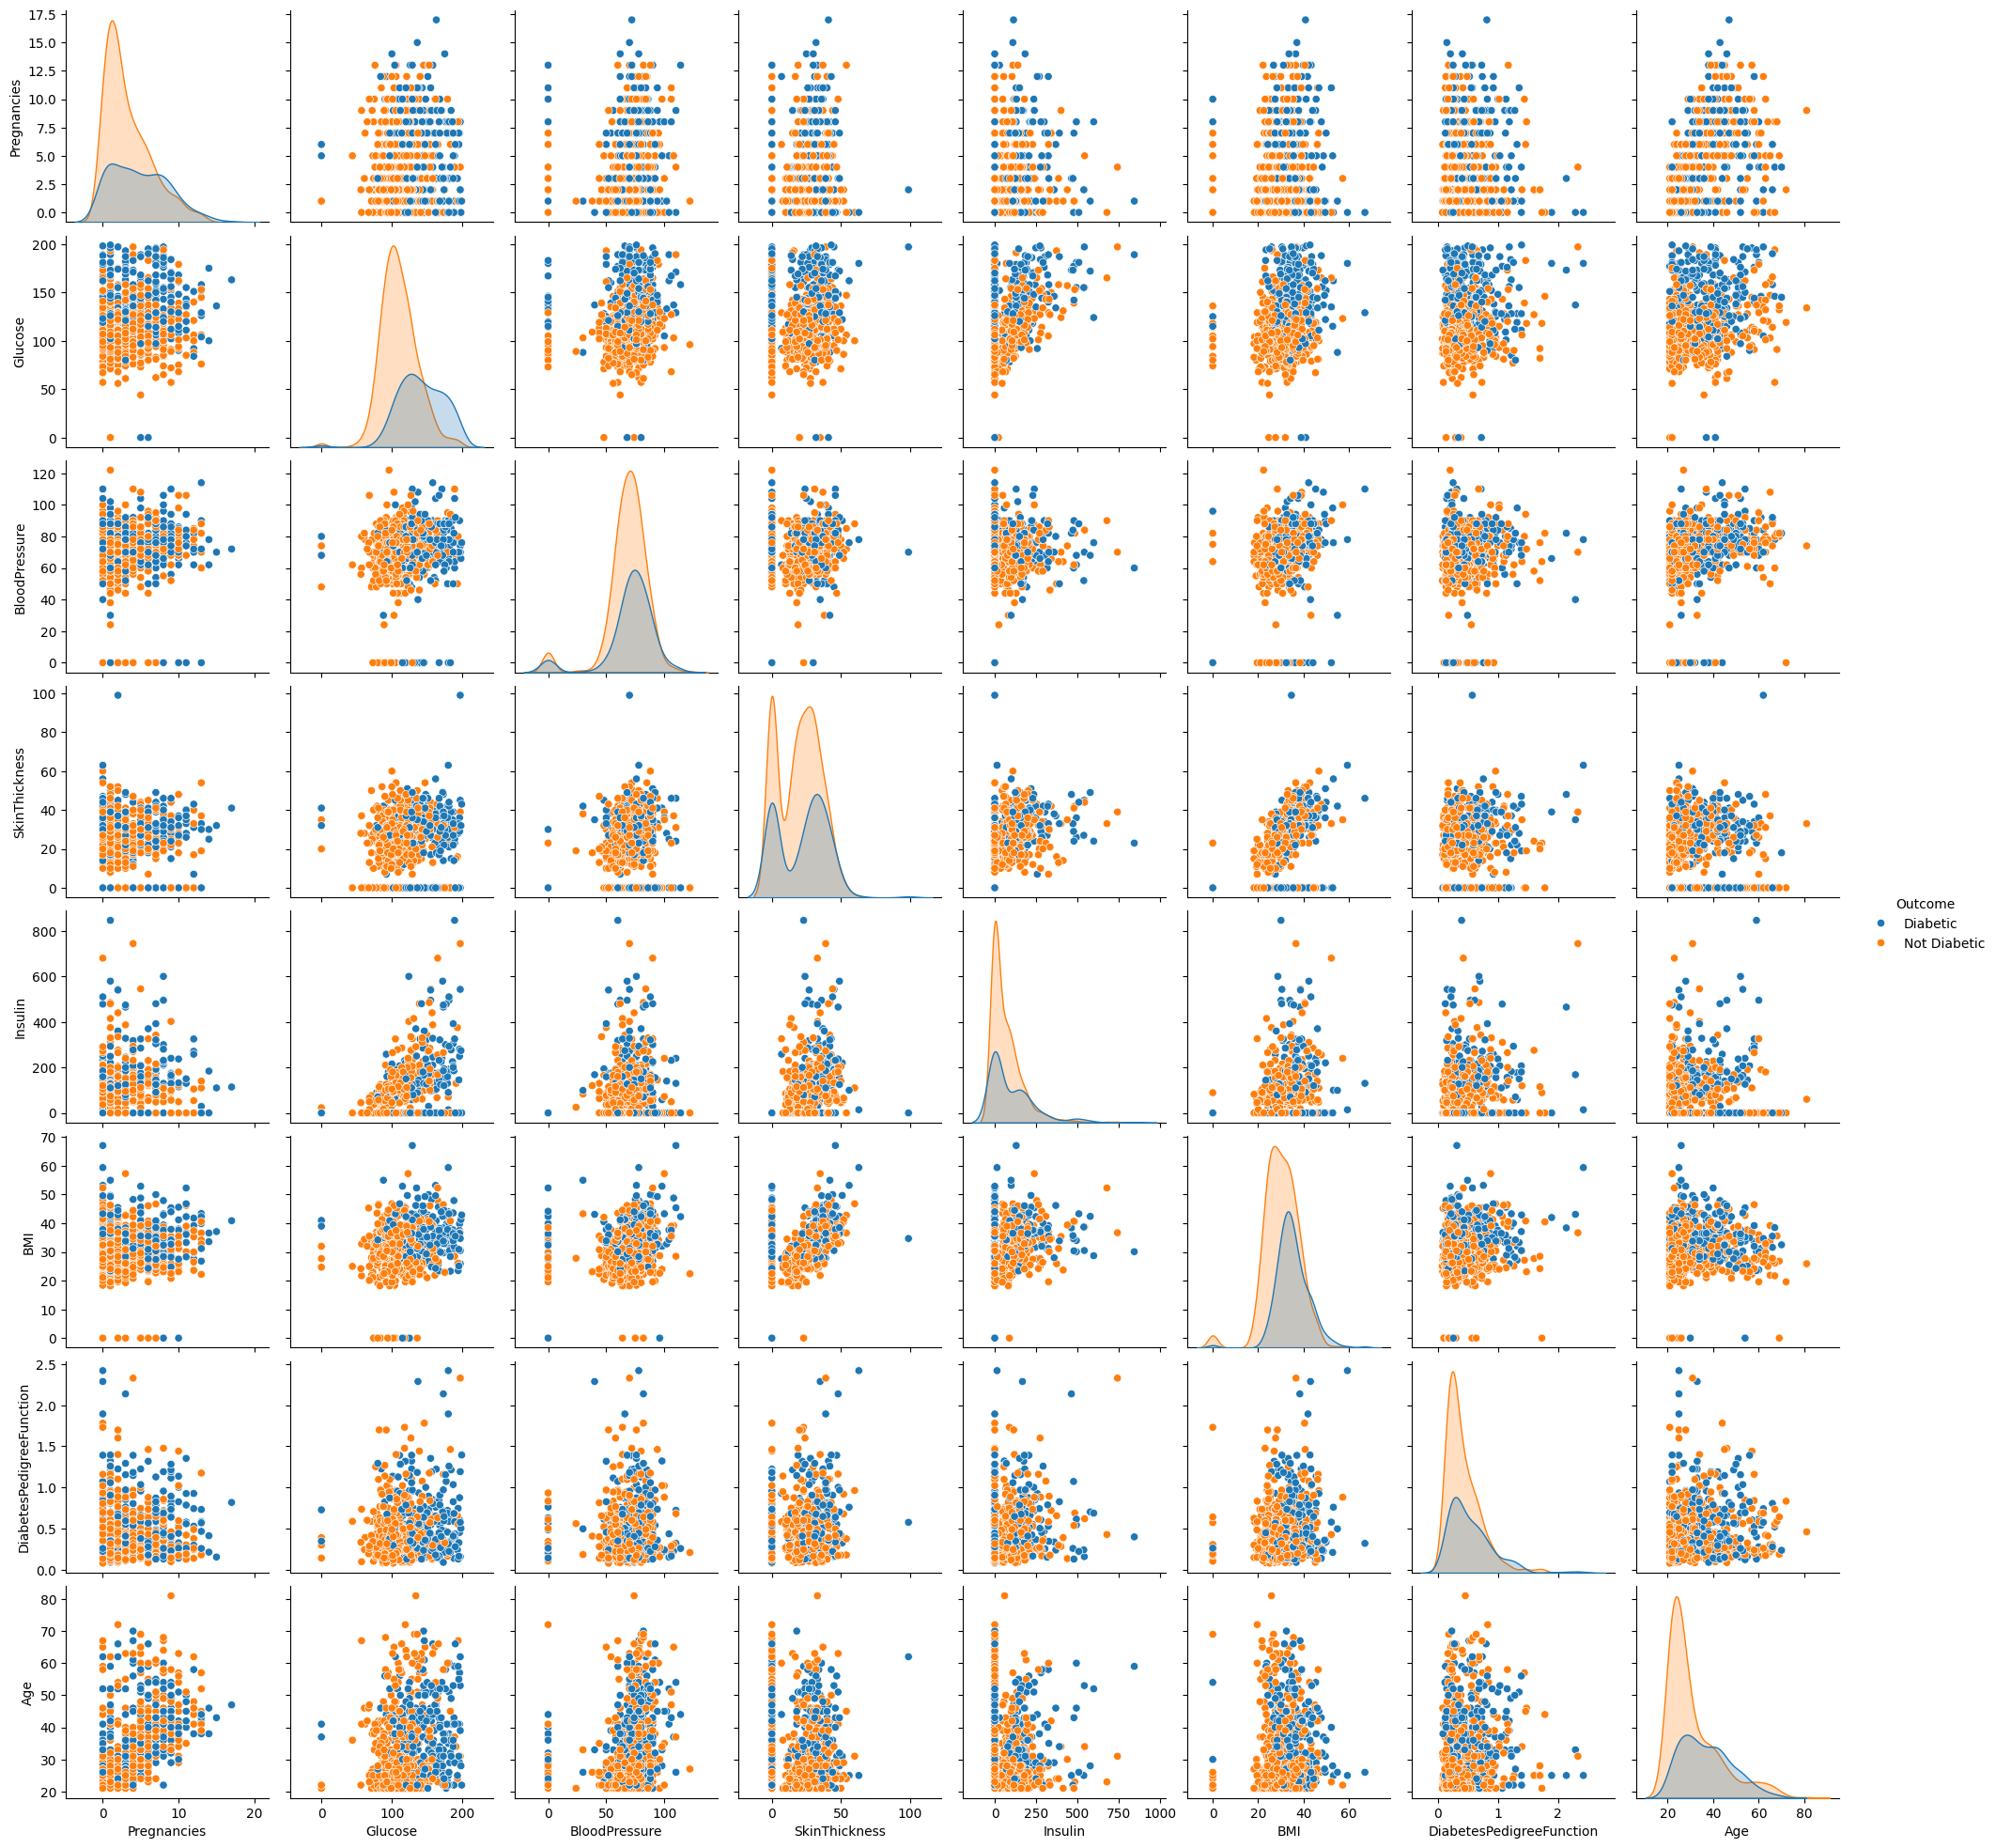

In [63]:
sns.pairplot(df,hue="Outcome")

In [64]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
X=df.drop("Outcome",axis=1).values #independent features
y=df["Outcome"].values #dependent features

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [67]:
#libraries from pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [68]:
#creating Tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [69]:
y_test

tensor([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
        1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [70]:
df.shape

(768, 9)

In [71]:
#Creating model with pytorch

class ANN_Model(nn.Module):
  def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
    super().__init__()
    self.f_connected1=nn.Linear(input_features,hidden1)
    self.f_connected2=nn.Linear(hidden1,hidden2)
    self.out=nn.Linear(hidden2,out_features)

  def forward(self,x):
    x=F.relu(self.f_connected1(x))
    x=F.relu(self.f_connected2(x))
    x=self.out(x)
    return x

In [72]:
#instantiate my ANN model
torch.manual_seed(20)
model=ANN_Model()

In [73]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [74]:
print(model)

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)


In [75]:
from torchsummary import summary
summary(model,input_size=(8,),device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 20]             180
            Linear-2                   [-1, 20]             420
            Linear-3                    [-1, 2]              42
Total params: 642
Trainable params: 642
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [76]:
#Backward Propogation-Define the loss fn & define the optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [77]:
epochs=500
final_losses=[]
for i in range(epochs):
  i=i+1
  y_pred=model.forward(X_train)
  loss=loss_function(y_pred,y_train)
  final_losses.append(loss.detach().numpy())
  if i%10==1:
    print("Epoch no:{} and the loss:{:.4f}".format(i,loss.item()))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch no:1 and the loss:3.4572
Epoch no:11 and the loss:1.4269
Epoch no:21 and the loss:0.8178
Epoch no:31 and the loss:0.6971
Epoch no:41 and the loss:0.6267
Epoch no:51 and the loss:0.6077
Epoch no:61 and the loss:0.5959
Epoch no:71 and the loss:0.5881
Epoch no:81 and the loss:0.5802
Epoch no:91 and the loss:0.5743
Epoch no:101 and the loss:0.5699
Epoch no:111 and the loss:0.5654
Epoch no:121 and the loss:0.5607
Epoch no:131 and the loss:0.5573
Epoch no:141 and the loss:0.5540
Epoch no:151 and the loss:0.5508
Epoch no:161 and the loss:0.5480
Epoch no:171 and the loss:0.5454
Epoch no:181 and the loss:0.5428
Epoch no:191 and the loss:0.5405
Epoch no:201 and the loss:0.5383
Epoch no:211 and the loss:0.5363
Epoch no:221 and the loss:0.5343
Epoch no:231 and the loss:0.5324
Epoch no:241 and the loss:0.5305
Epoch no:251 and the loss:0.5286
Epoch no:261 and the loss:0.5267
Epoch no:271 and the loss:0.5249
Epoch no:281 and the loss:0.5232
Epoch no:291 and the loss:0.5217
Epoch no:301 and the 

Text(0, 0.5, 'loss')

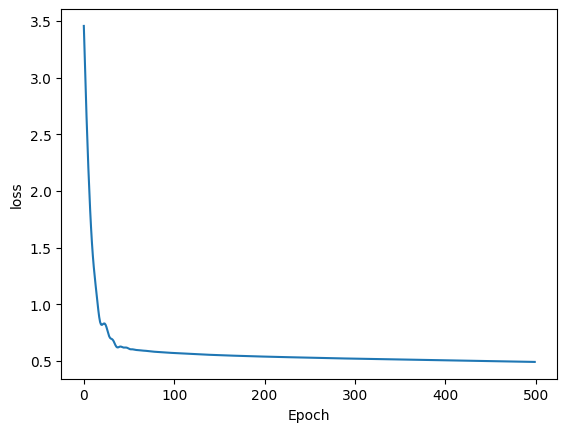

In [78]:
#plot the loss fn
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs),final_losses)
plt.xlabel("Epoch")
plt.ylabel("loss")

In [79]:
#Prediction in X_test data
predictions=[]
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_pred=model(data)
    predictions.append(y_pred.argmax().item())
    print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
1
1
1
0
0
0
0
1
0
0
0
1
0
1
0
0
1
0
1
0
0
1
0
0
1
0
1
0
0
1
1
0
0
0
1
1
0
0
1
0
0
1
0
1
0
1
1
0
0
0
0
0
0
0
1
1
1
1
0
1
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
1
1
1
0
0
0
1
0
0
0
0
0
1
1
0
0
0
0
1
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0


In [80]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[85, 22],
       [17, 30]])

Text(95.72222222222221, 0.5, 'Predicted Values')

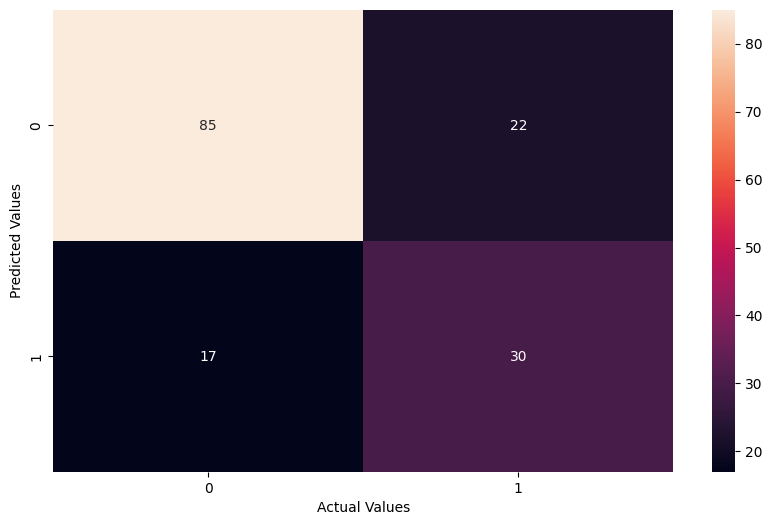

In [81]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [82]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7467532467532467

In [83]:
#save the model
torch.save(model,"diabetes.pt")

In [84]:
#save and load the model
model=torch.load("diabetes.pt")

In [85]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [86]:
#prediction of new data points
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [87]:
#new data
lst1=[6.0,130.0,72.0,40.0,0.0,25.6,0.627,45.0]

In [88]:
new_data=torch.tensor(lst1)

In [89]:
#predict new data using pytorch
with torch.no_grad():
  print(model(new_data))
  print(model(new_data).argmax().item())

tensor([3.0335, 3.0205])
0
